## Synthetix Perpetual Futures PnL Data & Report

In [1]:
import pandas as pd
import numpy as np
from datetime import datetime
from dotenv import load_dotenv
import requests, json, csv
import pickle
from web3 import Web3
from web3.middleware import geth_poa_middleware
import os

load_dotenv()

#%% Read Data Contract

def update_market_summaries():
    
    PerpsV2DataAbi = """
    [
        {
          "inputs": [
            {
              "internalType": "contract IAddressResolver",
              "name": "_resolverProxy",
              "type": "address"
            }
          ],
          "payable": false,
          "stateMutability": "nonpayable",
          "type": "constructor"
        },
        {
          "constant": true,
          "inputs": [],
          "name": "allMarketSummaries",
          "outputs": [
            {
              "components": [
                {
                  "internalType": "address",
                  "name": "market",
                  "type": "address"
                },
                {
                  "internalType": "bytes32",
                  "name": "asset",
                  "type": "bytes32"
                },
                {
                  "internalType": "bytes32",
                  "name": "key",
                  "type": "bytes32"
                },
                {
                  "internalType": "uint256",
                  "name": "maxLeverage",
                  "type": "uint256"
                },
                {
                  "internalType": "uint256",
                  "name": "price",
                  "type": "uint256"
                },
                {
                  "internalType": "uint256",
                  "name": "marketSize",
                  "type": "uint256"
                },
                {
                  "internalType": "int256",
                  "name": "marketSkew",
                  "type": "int256"
                },
                {
                  "internalType": "uint256",
                  "name": "marketDebt",
                  "type": "uint256"
                },
                {
                  "internalType": "int256",
                  "name": "currentFundingRate",
                  "type": "int256"
                },
                {
                  "internalType": "int256",
                  "name": "currentFundingVelocity",
                  "type": "int256"
                },
                {
                  "components": [
                    {
                      "internalType": "uint256",
                      "name": "takerFee",
                      "type": "uint256"
                    },
                    {
                      "internalType": "uint256",
                      "name": "makerFee",
                      "type": "uint256"
                    },
                    {
                      "internalType": "uint256",
                      "name": "takerFeeDelayedOrder",
                      "type": "uint256"
                    },
                    {
                      "internalType": "uint256",
                      "name": "makerFeeDelayedOrder",
                      "type": "uint256"
                    },
                    {
                      "internalType": "uint256",
                      "name": "takerFeeOffchainDelayedOrder",
                      "type": "uint256"
                    },
                    {
                      "internalType": "uint256",
                      "name": "makerFeeOffchainDelayedOrder",
                      "type": "uint256"
                    },
                    {
                      "internalType": "uint256",
                      "name": "overrideCommitFee",
                      "type": "uint256"
                    }
                  ],
                  "internalType": "struct PerpsV2MarketData.FeeRates",
                  "name": "feeRates",
                  "type": "tuple"
                }
              ],
              "internalType": "struct PerpsV2MarketData.MarketSummary[]",
              "name": "",
              "type": "tuple[]"
            }
          ],
          "payable": false,
          "stateMutability": "view",
          "type": "function"
        },
        {
          "constant": true,
          "inputs": [],
          "name": "allProxiedMarketSummaries",
          "outputs": [
            {
              "components": [
                {
                  "internalType": "address",
                  "name": "market",
                  "type": "address"
                },
                {
                  "internalType": "bytes32",
                  "name": "asset",
                  "type": "bytes32"
                },
                {
                  "internalType": "bytes32",
                  "name": "key",
                  "type": "bytes32"
                },
                {
                  "internalType": "uint256",
                  "name": "maxLeverage",
                  "type": "uint256"
                },
                {
                  "internalType": "uint256",
                  "name": "price",
                  "type": "uint256"
                },
                {
                  "internalType": "uint256",
                  "name": "marketSize",
                  "type": "uint256"
                },
                {
                  "internalType": "int256",
                  "name": "marketSkew",
                  "type": "int256"
                },
                {
                  "internalType": "uint256",
                  "name": "marketDebt",
                  "type": "uint256"
                },
                {
                  "internalType": "int256",
                  "name": "currentFundingRate",
                  "type": "int256"
                },
                {
                  "internalType": "int256",
                  "name": "currentFundingVelocity",
                  "type": "int256"
                },
                {
                  "components": [
                    {
                      "internalType": "uint256",
                      "name": "takerFee",
                      "type": "uint256"
                    },
                    {
                      "internalType": "uint256",
                      "name": "makerFee",
                      "type": "uint256"
                    },
                    {
                      "internalType": "uint256",
                      "name": "takerFeeDelayedOrder",
                      "type": "uint256"
                    },
                    {
                      "internalType": "uint256",
                      "name": "makerFeeDelayedOrder",
                      "type": "uint256"
                    },
                    {
                      "internalType": "uint256",
                      "name": "takerFeeOffchainDelayedOrder",
                      "type": "uint256"
                    },
                    {
                      "internalType": "uint256",
                      "name": "makerFeeOffchainDelayedOrder",
                      "type": "uint256"
                    },
                    {
                      "internalType": "uint256",
                      "name": "overrideCommitFee",
                      "type": "uint256"
                    }
                  ],
                  "internalType": "struct PerpsV2MarketData.FeeRates",
                  "name": "feeRates",
                  "type": "tuple"
                }
              ],
              "internalType": "struct PerpsV2MarketData.MarketSummary[]",
              "name": "",
              "type": "tuple[]"
            }
          ],
          "payable": false,
          "stateMutability": "view",
          "type": "function"
        },
        {
          "constant": true,
          "inputs": [],
          "name": "globals",
          "outputs": [
            {
              "components": [
                {
                  "internalType": "uint256",
                  "name": "minInitialMargin",
                  "type": "uint256"
                },
                {
                  "internalType": "uint256",
                  "name": "liquidationFeeRatio",
                  "type": "uint256"
                },
                {
                  "internalType": "uint256",
                  "name": "liquidationBufferRatio",
                  "type": "uint256"
                },
                {
                  "internalType": "uint256",
                  "name": "minKeeperFee",
                  "type": "uint256"
                }
              ],
              "internalType": "struct PerpsV2MarketData.FuturesGlobals",
              "name": "",
              "type": "tuple"
            }
          ],
          "payable": false,
          "stateMutability": "view",
          "type": "function"
        },
        {
          "constant": true,
          "inputs": [
            {
              "internalType": "contract IPerpsV2MarketViews",
              "name": "market",
              "type": "address"
            }
          ],
          "name": "marketDetails",
          "outputs": [
            {
              "components": [
                {
                  "internalType": "address",
                  "name": "market",
                  "type": "address"
                },
                {
                  "internalType": "bytes32",
                  "name": "baseAsset",
                  "type": "bytes32"
                },
                {
                  "internalType": "bytes32",
                  "name": "marketKey",
                  "type": "bytes32"
                },
                {
                  "components": [
                    {
                      "internalType": "uint256",
                      "name": "takerFee",
                      "type": "uint256"
                    },
                    {
                      "internalType": "uint256",
                      "name": "makerFee",
                      "type": "uint256"
                    },
                    {
                      "internalType": "uint256",
                      "name": "takerFeeDelayedOrder",
                      "type": "uint256"
                    },
                    {
                      "internalType": "uint256",
                      "name": "makerFeeDelayedOrder",
                      "type": "uint256"
                    },
                    {
                      "internalType": "uint256",
                      "name": "takerFeeOffchainDelayedOrder",
                      "type": "uint256"
                    },
                    {
                      "internalType": "uint256",
                      "name": "makerFeeOffchainDelayedOrder",
                      "type": "uint256"
                    },
                    {
                      "internalType": "uint256",
                      "name": "overrideCommitFee",
                      "type": "uint256"
                    }
                  ],
                  "internalType": "struct PerpsV2MarketData.FeeRates",
                  "name": "feeRates",
                  "type": "tuple"
                },
                {
                  "components": [
                    {
                      "internalType": "uint256",
                      "name": "maxLeverage",
                      "type": "uint256"
                    },
                    {
                      "internalType": "uint256",
                      "name": "maxMarketValue",
                      "type": "uint256"
                    }
                  ],
                  "internalType": "struct PerpsV2MarketData.MarketLimits",
                  "name": "limits",
                  "type": "tuple"
                },
                {
                  "components": [
                    {
                      "internalType": "uint256",
                      "name": "maxFundingVelocity",
                      "type": "uint256"
                    },
                    {
                      "internalType": "uint256",
                      "name": "skewScale",
                      "type": "uint256"
                    }
                  ],
                  "internalType": "struct PerpsV2MarketData.FundingParameters",
                  "name": "fundingParameters",
                  "type": "tuple"
                },
                {
                  "components": [
                    {
                      "internalType": "uint256",
                      "name": "marketSize",
                      "type": "uint256"
                    },
                    {
                      "components": [
                        {
                          "internalType": "uint256",
                          "name": "long",
                          "type": "uint256"
                        },
                        {
                          "internalType": "uint256",
                          "name": "short",
                          "type": "uint256"
                        }
                      ],
                      "internalType": "struct PerpsV2MarketData.Sides",
                      "name": "sides",
                      "type": "tuple"
                    },
                    {
                      "internalType": "uint256",
                      "name": "marketDebt",
                      "type": "uint256"
                    },
                    {
                      "internalType": "int256",
                      "name": "marketSkew",
                      "type": "int256"
                    }
                  ],
                  "internalType": "struct PerpsV2MarketData.MarketSizeDetails",
                  "name": "marketSizeDetails",
                  "type": "tuple"
                },
                {
                  "components": [
                    {
                      "internalType": "uint256",
                      "name": "price",
                      "type": "uint256"
                    },
                    {
                      "internalType": "bool",
                      "name": "invalid",
                      "type": "bool"
                    }
                  ],
                  "internalType": "struct PerpsV2MarketData.PriceDetails",
                  "name": "priceDetails",
                  "type": "tuple"
                }
              ],
              "internalType": "struct PerpsV2MarketData.MarketData",
              "name": "",
              "type": "tuple"
            }
          ],
          "payable": false,
          "stateMutability": "view",
          "type": "function"
        },
        {
          "constant": true,
          "inputs": [
            {
              "internalType": "bytes32",
              "name": "marketKey",
              "type": "bytes32"
            }
          ],
          "name": "marketDetailsForKey",
          "outputs": [
            {
              "components": [
                {
                  "internalType": "address",
                  "name": "market",
                  "type": "address"
                },
                {
                  "internalType": "bytes32",
                  "name": "baseAsset",
                  "type": "bytes32"
                },
                {
                  "internalType": "bytes32",
                  "name": "marketKey",
                  "type": "bytes32"
                },
                {
                  "components": [
                    {
                      "internalType": "uint256",
                      "name": "takerFee",
                      "type": "uint256"
                    },
                    {
                      "internalType": "uint256",
                      "name": "makerFee",
                      "type": "uint256"
                    },
                    {
                      "internalType": "uint256",
                      "name": "takerFeeDelayedOrder",
                      "type": "uint256"
                    },
                    {
                      "internalType": "uint256",
                      "name": "makerFeeDelayedOrder",
                      "type": "uint256"
                    },
                    {
                      "internalType": "uint256",
                      "name": "takerFeeOffchainDelayedOrder",
                      "type": "uint256"
                    },
                    {
                      "internalType": "uint256",
                      "name": "makerFeeOffchainDelayedOrder",
                      "type": "uint256"
                    },
                    {
                      "internalType": "uint256",
                      "name": "overrideCommitFee",
                      "type": "uint256"
                    }
                  ],
                  "internalType": "struct PerpsV2MarketData.FeeRates",
                  "name": "feeRates",
                  "type": "tuple"
                },
                {
                  "components": [
                    {
                      "internalType": "uint256",
                      "name": "maxLeverage",
                      "type": "uint256"
                    },
                    {
                      "internalType": "uint256",
                      "name": "maxMarketValue",
                      "type": "uint256"
                    }
                  ],
                  "internalType": "struct PerpsV2MarketData.MarketLimits",
                  "name": "limits",
                  "type": "tuple"
                },
                {
                  "components": [
                    {
                      "internalType": "uint256",
                      "name": "maxFundingVelocity",
                      "type": "uint256"
                    },
                    {
                      "internalType": "uint256",
                      "name": "skewScale",
                      "type": "uint256"
                    }
                  ],
                  "internalType": "struct PerpsV2MarketData.FundingParameters",
                  "name": "fundingParameters",
                  "type": "tuple"
                },
                {
                  "components": [
                    {
                      "internalType": "uint256",
                      "name": "marketSize",
                      "type": "uint256"
                    },
                    {
                      "components": [
                        {
                          "internalType": "uint256",
                          "name": "long",
                          "type": "uint256"
                        },
                        {
                          "internalType": "uint256",
                          "name": "short",
                          "type": "uint256"
                        }
                      ],
                      "internalType": "struct PerpsV2MarketData.Sides",
                      "name": "sides",
                      "type": "tuple"
                    },
                    {
                      "internalType": "uint256",
                      "name": "marketDebt",
                      "type": "uint256"
                    },
                    {
                      "internalType": "int256",
                      "name": "marketSkew",
                      "type": "int256"
                    }
                  ],
                  "internalType": "struct PerpsV2MarketData.MarketSizeDetails",
                  "name": "marketSizeDetails",
                  "type": "tuple"
                },
                {
                  "components": [
                    {
                      "internalType": "uint256",
                      "name": "price",
                      "type": "uint256"
                    },
                    {
                      "internalType": "bool",
                      "name": "invalid",
                      "type": "bool"
                    }
                  ],
                  "internalType": "struct PerpsV2MarketData.PriceDetails",
                  "name": "priceDetails",
                  "type": "tuple"
                }
              ],
              "internalType": "struct PerpsV2MarketData.MarketData",
              "name": "",
              "type": "tuple"
            }
          ],
          "payable": false,
          "stateMutability": "view",
          "type": "function"
        },
        {
          "constant": true,
          "inputs": [
            {
              "internalType": "address[]",
              "name": "markets",
              "type": "address[]"
            }
          ],
          "name": "marketSummaries",
          "outputs": [
            {
              "components": [
                {
                  "internalType": "address",
                  "name": "market",
                  "type": "address"
                },
                {
                  "internalType": "bytes32",
                  "name": "asset",
                  "type": "bytes32"
                },
                {
                  "internalType": "bytes32",
                  "name": "key",
                  "type": "bytes32"
                },
                {
                  "internalType": "uint256",
                  "name": "maxLeverage",
                  "type": "uint256"
                },
                {
                  "internalType": "uint256",
                  "name": "price",
                  "type": "uint256"
                },
                {
                  "internalType": "uint256",
                  "name": "marketSize",
                  "type": "uint256"
                },
                {
                  "internalType": "int256",
                  "name": "marketSkew",
                  "type": "int256"
                },
                {
                  "internalType": "uint256",
                  "name": "marketDebt",
                  "type": "uint256"
                },
                {
                  "internalType": "int256",
                  "name": "currentFundingRate",
                  "type": "int256"
                },
                {
                  "internalType": "int256",
                  "name": "currentFundingVelocity",
                  "type": "int256"
                },
                {
                  "components": [
                    {
                      "internalType": "uint256",
                      "name": "takerFee",
                      "type": "uint256"
                    },
                    {
                      "internalType": "uint256",
                      "name": "makerFee",
                      "type": "uint256"
                    },
                    {
                      "internalType": "uint256",
                      "name": "takerFeeDelayedOrder",
                      "type": "uint256"
                    },
                    {
                      "internalType": "uint256",
                      "name": "makerFeeDelayedOrder",
                      "type": "uint256"
                    },
                    {
                      "internalType": "uint256",
                      "name": "takerFeeOffchainDelayedOrder",
                      "type": "uint256"
                    },
                    {
                      "internalType": "uint256",
                      "name": "makerFeeOffchainDelayedOrder",
                      "type": "uint256"
                    },
                    {
                      "internalType": "uint256",
                      "name": "overrideCommitFee",
                      "type": "uint256"
                    }
                  ],
                  "internalType": "struct PerpsV2MarketData.FeeRates",
                  "name": "feeRates",
                  "type": "tuple"
                }
              ],
              "internalType": "struct PerpsV2MarketData.MarketSummary[]",
              "name": "",
              "type": "tuple[]"
            }
          ],
          "payable": false,
          "stateMutability": "view",
          "type": "function"
        },
        {
          "constant": true,
          "inputs": [
            {
              "internalType": "bytes32[]",
              "name": "marketKeys",
              "type": "bytes32[]"
            }
          ],
          "name": "marketSummariesForKeys",
          "outputs": [
            {
              "components": [
                {
                  "internalType": "address",
                  "name": "market",
                  "type": "address"
                },
                {
                  "internalType": "bytes32",
                  "name": "asset",
                  "type": "bytes32"
                },
                {
                  "internalType": "bytes32",
                  "name": "key",
                  "type": "bytes32"
                },
                {
                  "internalType": "uint256",
                  "name": "maxLeverage",
                  "type": "uint256"
                },
                {
                  "internalType": "uint256",
                  "name": "price",
                  "type": "uint256"
                },
                {
                  "internalType": "uint256",
                  "name": "marketSize",
                  "type": "uint256"
                },
                {
                  "internalType": "int256",
                  "name": "marketSkew",
                  "type": "int256"
                },
                {
                  "internalType": "uint256",
                  "name": "marketDebt",
                  "type": "uint256"
                },
                {
                  "internalType": "int256",
                  "name": "currentFundingRate",
                  "type": "int256"
                },
                {
                  "internalType": "int256",
                  "name": "currentFundingVelocity",
                  "type": "int256"
                },
                {
                  "components": [
                    {
                      "internalType": "uint256",
                      "name": "takerFee",
                      "type": "uint256"
                    },
                    {
                      "internalType": "uint256",
                      "name": "makerFee",
                      "type": "uint256"
                    },
                    {
                      "internalType": "uint256",
                      "name": "takerFeeDelayedOrder",
                      "type": "uint256"
                    },
                    {
                      "internalType": "uint256",
                      "name": "makerFeeDelayedOrder",
                      "type": "uint256"
                    },
                    {
                      "internalType": "uint256",
                      "name": "takerFeeOffchainDelayedOrder",
                      "type": "uint256"
                    },
                    {
                      "internalType": "uint256",
                      "name": "makerFeeOffchainDelayedOrder",
                      "type": "uint256"
                    },
                    {
                      "internalType": "uint256",
                      "name": "overrideCommitFee",
                      "type": "uint256"
                    }
                  ],
                  "internalType": "struct PerpsV2MarketData.FeeRates",
                  "name": "feeRates",
                  "type": "tuple"
                }
              ],
              "internalType": "struct PerpsV2MarketData.MarketSummary[]",
              "name": "",
              "type": "tuple[]"
            }
          ],
          "payable": false,
          "stateMutability": "view",
          "type": "function"
        },
        {
          "constant": true,
          "inputs": [
            {
              "internalType": "bytes32",
              "name": "marketKey",
              "type": "bytes32"
            }
          ],
          "name": "parameters",
          "outputs": [
            {
              "components": [
                {
                  "internalType": "uint256",
                  "name": "takerFee",
                  "type": "uint256"
                },
                {
                  "internalType": "uint256",
                  "name": "makerFee",
                  "type": "uint256"
                },
                {
                  "internalType": "uint256",
                  "name": "overrideCommitFee",
                  "type": "uint256"
                },
                {
                  "internalType": "uint256",
                  "name": "takerFeeDelayedOrder",
                  "type": "uint256"
                },
                {
                  "internalType": "uint256",
                  "name": "makerFeeDelayedOrder",
                  "type": "uint256"
                },
                {
                  "internalType": "uint256",
                  "name": "takerFeeOffchainDelayedOrder",
                  "type": "uint256"
                },
                {
                  "internalType": "uint256",
                  "name": "makerFeeOffchainDelayedOrder",
                  "type": "uint256"
                },
                {
                  "internalType": "uint256",
                  "name": "maxLeverage",
                  "type": "uint256"
                },
                {
                  "internalType": "uint256",
                  "name": "maxMarketValue",
                  "type": "uint256"
                },
                {
                  "internalType": "uint256",
                  "name": "maxFundingVelocity",
                  "type": "uint256"
                },
                {
                  "internalType": "uint256",
                  "name": "skewScale",
                  "type": "uint256"
                },
                {
                  "internalType": "uint256",
                  "name": "nextPriceConfirmWindow",
                  "type": "uint256"
                },
                {
                  "internalType": "uint256",
                  "name": "delayedOrderConfirmWindow",
                  "type": "uint256"
                },
                {
                  "internalType": "uint256",
                  "name": "minDelayTimeDelta",
                  "type": "uint256"
                },
                {
                  "internalType": "uint256",
                  "name": "maxDelayTimeDelta",
                  "type": "uint256"
                },
                {
                  "internalType": "uint256",
                  "name": "offchainDelayedOrderMinAge",
                  "type": "uint256"
                },
                {
                  "internalType": "uint256",
                  "name": "offchainDelayedOrderMaxAge",
                  "type": "uint256"
                },
                {
                  "internalType": "bytes32",
                  "name": "offchainMarketKey",
                  "type": "bytes32"
                },
                {
                  "internalType": "uint256",
                  "name": "offchainPriceDivergence",
                  "type": "uint256"
                }
              ],
              "internalType": "struct IPerpsV2MarketSettings.Parameters",
              "name": "",
              "type": "tuple"
            }
          ],
          "payable": false,
          "stateMutability": "view",
          "type": "function"
        },
        {
          "constant": true,
          "inputs": [
            {
              "internalType": "contract IPerpsV2MarketViews",
              "name": "market",
              "type": "address"
            },
            {
              "internalType": "address",
              "name": "account",
              "type": "address"
            }
          ],
          "name": "positionDetails",
          "outputs": [
            {
              "components": [
                {
                  "components": [
                    {
                      "internalType": "uint64",
                      "name": "id",
                      "type": "uint64"
                    },
                    {
                      "internalType": "uint64",
                      "name": "lastFundingIndex",
                      "type": "uint64"
                    },
                    {
                      "internalType": "uint128",
                      "name": "margin",
                      "type": "uint128"
                    },
                    {
                      "internalType": "uint128",
                      "name": "lastPrice",
                      "type": "uint128"
                    },
                    {
                      "internalType": "int128",
                      "name": "size",
                      "type": "int128"
                    }
                  ],
                  "internalType": "struct IPerpsV2MarketBaseTypes.Position",
                  "name": "position",
                  "type": "tuple"
                },
                {
                  "internalType": "int256",
                  "name": "notionalValue",
                  "type": "int256"
                },
                {
                  "internalType": "int256",
                  "name": "profitLoss",
                  "type": "int256"
                },
                {
                  "internalType": "int256",
                  "name": "accruedFunding",
                  "type": "int256"
                },
                {
                  "internalType": "uint256",
                  "name": "remainingMargin",
                  "type": "uint256"
                },
                {
                  "internalType": "uint256",
                  "name": "accessibleMargin",
                  "type": "uint256"
                },
                {
                  "internalType": "uint256",
                  "name": "liquidationPrice",
                  "type": "uint256"
                },
                {
                  "internalType": "bool",
                  "name": "canLiquidatePosition",
                  "type": "bool"
                }
              ],
              "internalType": "struct PerpsV2MarketData.PositionData",
              "name": "",
              "type": "tuple"
            }
          ],
          "payable": false,
          "stateMutability": "view",
          "type": "function"
        },
        {
          "constant": true,
          "inputs": [
            {
              "internalType": "bytes32",
              "name": "marketKey",
              "type": "bytes32"
            },
            {
              "internalType": "address",
              "name": "account",
              "type": "address"
            }
          ],
          "name": "positionDetailsForMarketKey",
          "outputs": [
            {
              "components": [
                {
                  "components": [
                    {
                      "internalType": "uint64",
                      "name": "id",
                      "type": "uint64"
                    },
                    {
                      "internalType": "uint64",
                      "name": "lastFundingIndex",
                      "type": "uint64"
                    },
                    {
                      "internalType": "uint128",
                      "name": "margin",
                      "type": "uint128"
                    },
                    {
                      "internalType": "uint128",
                      "name": "lastPrice",
                      "type": "uint128"
                    },
                    {
                      "internalType": "int128",
                      "name": "size",
                      "type": "int128"
                    }
                  ],
                  "internalType": "struct IPerpsV2MarketBaseTypes.Position",
                  "name": "position",
                  "type": "tuple"
                },
                {
                  "internalType": "int256",
                  "name": "notionalValue",
                  "type": "int256"
                },
                {
                  "internalType": "int256",
                  "name": "profitLoss",
                  "type": "int256"
                },
                {
                  "internalType": "int256",
                  "name": "accruedFunding",
                  "type": "int256"
                },
                {
                  "internalType": "uint256",
                  "name": "remainingMargin",
                  "type": "uint256"
                },
                {
                  "internalType": "uint256",
                  "name": "accessibleMargin",
                  "type": "uint256"
                },
                {
                  "internalType": "uint256",
                  "name": "liquidationPrice",
                  "type": "uint256"
                },
                {
                  "internalType": "bool",
                  "name": "canLiquidatePosition",
                  "type": "bool"
                }
              ],
              "internalType": "struct PerpsV2MarketData.PositionData",
              "name": "",
              "type": "tuple"
            }
          ],
          "payable": false,
          "stateMutability": "view",
          "type": "function"
        },
        {
          "constant": true,
          "inputs": [],
          "name": "resolverProxy",
          "outputs": [
            {
              "internalType": "contract IAddressResolver",
              "name": "",
              "type": "address"
            }
          ],
          "payable": false,
          "stateMutability": "view",
          "type": "function"
        }
      ]
    """

    BLOCKS_LOOKBACK = 2000
    PERIOD_MINUTES = 10
    PROVIDER_URL_OP = os.environ.get("PROVIDER_URL_OP")
    
    web3 = Web3(Web3.HTTPProvider(PROVIDER_URL_OP))
    web3.is_connected()
    
    PerpsV2DataAddress = "0xF7D3D05cCeEEcC9d77864Da3DdE67Ce9a0215A9D"
    perpsV2Data = web3.eth.contract(address=PerpsV2DataAddress, abi=PerpsV2DataAbi)
    
    web3.client_version
    web3.middleware_onion.inject(geth_poa_middleware, layer=0)
    
    # block_number_start = 52456564  # Perps start block
    # timestamp = web3.eth.get_block(block_number_start).timestamp

    def estimate_next_block_number_in_minutes(block_number, 
                                              timestamp,
                                              block_number_end,
                                              blocks_lookback,
                                              period_minutes):
        ts0 = web3.eth.get_block(block_number - blocks_lookback).timestamp
        ts1 = timestamp
        time_diff = pd.to_datetime(ts1 , unit='s') - pd.to_datetime(ts0 , unit='s')
        time_diff_sec = time_diff.value/1e9
        factor = period_minutes * 60 / (time_diff_sec)
        block_number_next = block_number + int(blocks_lookback * factor)
        if block_number_next > block_number_end:
            block_number_next = block_number_end
        ts2 = web3.eth.get_block(block_number_next).timestamp
        time_diff = pd.to_datetime(ts2 , unit='s') - pd.to_datetime(ts1 , unit='s')
        return block_number_next, ts2, block_number_next - block_number, time_diff.value/1e9/60
    
    df_markets = pd.DataFrame()
    # df_markets = pd.read_csv('markatsSummaries.csv')
    # df_markets.drop(['Unnamed: 0', 'date', 'datetime'], axis=1, inplace=True)
    with open('df_markatsSummaries.pickle', 'rb') as handle:
        df_markets = pickle.load(handle)
    df_markets.drop(['date', 'datetime'], axis=1, inplace=True)
    
    timestamp = int(df_markets.tail(1).timestamp.iloc[0])
    block_number_start = int(df_markets.tail(1).block_number.iloc[0])
    block_number_end = web3.eth.get_block_number()
    block_number = block_number_start

    while (block_number < block_number_end):
        block_number, timestamp, blocks_skip, minutes_skip = \
            estimate_next_block_number_in_minutes(block_number, 
                                                  timestamp,
                                                  block_number_end,
                                                  blocks_lookback = BLOCKS_LOOKBACK, 
                                                  period_minutes = PERIOD_MINUTES)
        progress = int((block_number - block_number_start) / (block_number_end - block_number_start) * 100)
        try: 
            marketSummaries = perpsV2Data.functions.allProxiedMarketSummaries().call(block_identifier=block_number)
            markets = [{
                'block_number': block_number,
                'timestamp': timestamp,
                'market': mkt[1].decode().replace('\x00', ''),
                'market_size': web3.from_wei(mkt[5], unit='ether'),
                'market_debt': web3.from_wei(mkt[7], unit='ether')
            } for mkt in marketSummaries]
            df_markets = pd.concat([df_markets, 
                                    pd.DataFrame(markets).sort_values(by='market_debt', ascending=False)])
            print(progress, block_number, pd.to_datetime(timestamp, unit='s'), blocks_skip, 10, minutes_skip, df_markets.tail(1).market.iloc[0], int(df_markets.market_size.tail(1).iloc[0]), len(df_markets))
        except Exception:
            pass
        
    df_markets['date'] = pd.to_datetime(df_markets['timestamp'], unit='s').dt.date
    df_markets['datetime'] = pd.to_datetime(df_markets['timestamp'], unit='s').dt.round("10min")

    with open('df_markatsSummaries.pickle', 'wb') as handle:
        pickle.dump(df_markets, handle, protocol=pickle.HIGHEST_PROTOCOL)
    df_markets.to_csv('markatsSummaries.csv')

    return df_markets


#%% Graph Perps Trasfers & Trades

def get_perps_transfers():

    SUBGRAPH_ENDPOINT_URL = 'https://api.thegraph.com/subgraphs/name/tburm/optimism-perps'

    def q_perps_transfers(first, last_id):
        queryStr = """
        {
            futuresMarginTransfers(first: %s, where: {id_gt: "%s"} ) {
                id
                timestamp
                account
                market
                size
                asset
                txHash
            }
        }""" % (first, last_id)
        return queryStr
    
    def getPerpsTransfers():
        data = []
        pageSize = 1000
        last_id = '0x'
        count = 0
        while(1):
            query = q_perps_transfers(pageSize, last_id)
            r = requests.post(SUBGRAPH_ENDPOINT_URL, json={'query': query})
            page = json.loads(r.text)['data']['futuresMarginTransfers']
            data.extend(page)
            count += len(page)
            print(pd.to_datetime(page[-1]['timestamp'], unit='s'), count)
            if len(page) < pageSize:# or count == 4000:
                break
            last_id = page[-1]['id']
        print('total perps transfers = ' + str(count))
        return pd.DataFrame(data), count
    
    pT, pT_n = getPerpsTransfers()
    
    with open('perpsTransfers.pickle', 'wb') as handle:
        pickle.dump(pT, handle, protocol=pickle.HIGHEST_PROTOCOL)
    pT.to_csv('perpsTransfers.csv')
    
    return


def get_futures_trades():

    SUBGRAPH_ENDPOINT_URL = 'https://api.thegraph.com/subgraphs/name/tburm/optimism-perps'

    def q_futures_trades(first, last_id):
        queryStr = """
        {
             futuresTrades(first: %s, where: {id_gt: "%s"} ) {
                id
                account
                timestamp
                asset
                marketKey
                orderType
                price
                margin
                positionId
                feesPaid
                pnl
                size
                positionSize
                positionClosed
                trackingCode
    		}
        }""" % (first, last_id)
        return queryStr
    
    def getFuturesTrades():
        data = []
        pageSize = 1000
        last_id = '0x'
        count = 0
        while(1):
            query = q_futures_trades(pageSize, last_id)
            r = requests.post(SUBGRAPH_ENDPOINT_URL, json={'query': query})
            page = json.loads(r.text)['data']['futuresTrades']
            data.extend(page)
            count += len(page)
            print(pd.to_datetime(page[-1]['timestamp'], unit='s'), count)
            if len(page) < pageSize:# or count == 2000:
                break
            last_id = page[-1]['id']
    
        print('total futures trades = ' + str(count))
        return pd.DataFrame(data), count
    
    futuresTrades, futuresTrades_n = getFuturesTrades()
    
    futuresTrades['marketKeyStr'] = futuresTrades.marketKey.apply(Web3.to_text)
    futuresTrades['assetStr'] = futuresTrades.asset.apply(Web3.to_text)
    futuresTrades['datetime'] = pd.to_datetime(futuresTrades.timestamp, unit='s')
    
    with open('futuresTrades.pickle', 'wb') as handle:
        pickle.dump(futuresTrades, handle, protocol=pickle.HIGHEST_PROTOCOL)
    futuresTrades.to_csv('futuresTrades.csv')
    
    return

#%% Functions (Troy)

def process_transfers_trades_datasets():
    
    from decimal import Decimal
    
    def convertDecimals(x): return Decimal(x) / Decimal(10**18)
    
    def convertBytes(x): return bytearray.fromhex(
        x[2:]).decode().replace('\x00', '')
    
    def clean_df(df, decimal_cols=[], bytes_cols=[]):
        for col in decimal_cols:
            if col in df.columns:
                df[col] = df[col].apply(convertDecimals)
            else:
                print(f"{col} not in DataFrame")
        for col in bytes_cols:
            if col in df.columns:
                df[col] = df[col].apply(convertBytes)
            else:
                print(f"{col} not in DataFrame")
        return df

    futuresTrades = pd.DataFrame()
    with open('futuresTrades.pickle', 'rb') as handle:
        futuresTrades = pickle.load(handle)

    trade_params = {
        'last_id': ''
    }
    
    trade_decimal_cols = [
        'price',
        'margin',
        'feesPaid',
        'pnl',
        'size',
        'positionSize',
    ]
    
    trade_bytes_cols = ['asset']
    
    df_trade = futuresTrades
    df_trade = df_trade.replace({None: np.nan})
    df_trade = clean_df(df_trade, decimal_cols=trade_decimal_cols, bytes_cols=trade_bytes_cols)
    
    with open('futuresTradesClean.pickle', 'wb') as handle:
        pickle.dump(df_trade, handle, protocol=pickle.HIGHEST_PROTOCOL)
    
    perpsTransfers = pd.DataFrame()
    with open('perpsTransfers.pickle', 'rb') as handle:
        perpsTransfers = pickle.load(handle)

    transfer_params = {
        'last_id': ''
    }
    
    transfer_cols = [
        'size',
    ]
    
    transfer_bytes_cols = [
        'asset'
    ]
    
    df_transfer = perpsTransfers
    df_transfer = df_transfer.replace({None: np.nan})
    df_transfer = clean_df(df_transfer, decimal_cols=transfer_cols, bytes_cols=transfer_bytes_cols)
    
    with open('perpsTransfersClean.pickle', 'wb') as handle:
        pickle.dump(df_transfer, handle, protocol=pickle.HIGHEST_PROTOCOL)
    
    return df_transfer, df_trade

#%% Time Dimension (hourly resolution)

def generate_charts_and_cvs_files():

    import pandas as pd
    import numpy as np
    import pickle
    import time
    import matplotlib.pyplot as plt
    import os
    import warnings

    warnings.filterwarnings("ignore")
    validate = False
    
    with open('df_markatsSummaries.pickle', 'rb') as handle:
        df_markets = pickle.load(handle)
    
    df_markets['datetime'] = pd.to_datetime(df_markets['timestamp'], unit='s').dt.round("s")
    market_debt = df_markets.pivot(index='block_number', columns='market', values='market_debt').reset_index()
    market_debt_idx = df_markets.pivot(index='block_number', columns='market', values='timestamp').reset_index()
    market_debt_idx = market_debt_idx.sETH
    market_debt_idx.name = 'timestamp'
    market_debt = pd.concat([market_debt, market_debt_idx], axis=1)
    market_debt['datetime'] = pd.to_datetime(market_debt['timestamp'], unit='s').dt.round("1H")
    market_debt = market_debt.drop_duplicates(subset=['datetime'], keep='last')
    market_debt.dropna(subset=['sETH'], inplace=True)
    market_debt.drop(['block_number'], axis=1, inplace=True)
    market_debt.set_index('datetime', inplace=True)
    market_debt.fillna(method="ffill", inplace=True)
    
    # Manual data inspection validation
    if validate:
        for market in market_debt.drop('timestamp', axis=1).columns[::-1]:
            time.sleep(2)
            # i = input("Press Enter to continue: ")
            tmp = pd.concat([market_debt[market], market_debt[market].apply(pd.to_numeric).diff()], axis=1)
            tmp = pd.concat([tmp, market_debt[market].apply(pd.to_numeric).fillna(0).diff(7*24)], axis=1).apply(pd.to_numeric)
            tmp.columns = [market, market +'-diff', market +'-rol']
            tmp.plot(figsize=[16,8], subplots=False, ylim=[-2e6,1e7])
            plt.show()
    
    with open('perpsTransfersClean.pickle', 'rb') as handle:
        df_transfer = pickle.load(handle)
    
    df_transfer['datetime'] = pd.to_datetime(df_transfer['timestamp'], unit='s').dt.round("1H")
    transfers = df_transfer.groupby(['datetime', 'asset'], as_index = False)['size'].agg(sum).pivot('datetime','asset','size').fillna(0).reset_index().set_index('datetime')
    
    # Manual data inspection validation
    if validate:
        for market in transfers.columns[::-1]:
            time.sleep(2)
            # i = input("Press Enter to continue: ")
            tmp = pd.concat([transfers[market], transfers[market].apply(pd.to_numeric).cumsum()], axis=1).apply(pd.to_numeric)
            tmp = pd.concat([tmp, transfers[market].apply(pd.to_numeric).fillna(0).diff(7*24*5)], axis=1).apply(pd.to_numeric)
            tmp.columns = [market +'-diff', market, market +'-rol']
            tmp.plot(figsize=[16,8], subplots=False, ylim=[-2e6,2e7])
            plt.show()
    
    with open('futuresTradesClean.pickle', 'rb') as handle:
        df_trade = pickle.load(handle)
    
    df_trade['datetime'] = pd.to_datetime(df_trade['timestamp'], unit='s').dt.round("1H")
    fees_paid = df_trade.groupby(['datetime', 'asset'], as_index = False)['feesPaid'].agg(sum).pivot('datetime','asset','feesPaid').fillna(0).reset_index().set_index('datetime')
    
    # Manual data inspection validation
    if validate:
        for market in fees_paid.columns[::-1]:
            time.sleep(2)
            # i = input("Press Enter to continue: ")
            tmp = pd.concat([fees_paid[market], fees_paid[market].apply(pd.to_numeric).cumsum()], axis=1).apply(pd.to_numeric)
            tmp = pd.concat([tmp, fees_paid[market].apply(pd.to_numeric).fillna(0).diff(7*24*5)], axis=1).apply(pd.to_numeric)
            tmp.columns = [market +'-diff', market, market +'-rol']
            tmp.plot(figsize=[16,8], subplots=False, ylim=[-5e5,3e6])
            plt.show()
    
    df_net_pnl = pd.DataFrame()
    df_net_pnl_m = pd.DataFrame()
    df_net_pnl_rol = pd.DataFrame()
    df_net_pnl_rol_market_debt = pd.DataFrame()
    df_net_pnl_rol_transfers = pd.DataFrame()
    df_net_pnl_rol_fees_paid = pd.DataFrame()
    
    market_debt = market_debt.iloc[:, np.argsort(-market_debt.iloc[-1,:])]
    for market in market_debt.drop('timestamp', axis=1).columns:
        if market in transfers.columns: 
            tmp = market_debt[market].apply(pd.to_numeric).replace(to_replace=0, method='ffill').fillna(0)
            tmp = pd.concat([tmp, transfers[market].apply(pd.to_numeric).fillna(0).cumsum()], axis=1)
            tmp = pd.concat([tmp, fees_paid[market].apply(pd.to_numeric).fillna(0).cumsum()], axis=1)
            tmp.columns = ['market_debt', 'transfers', 'fees_paid']
            tmp = tmp.mul([1, -1, -1], axis=1)
    
            df_net_pnl_rol_market_debt = pd.concat([df_net_pnl_rol_market_debt, tmp.market_debt], axis=1) 
            df_net_pnl_rol_transfers = pd.concat([df_net_pnl_rol_transfers, tmp.transfers], axis=1) 
            df_net_pnl_rol_fees_paid = pd.concat([df_net_pnl_rol_fees_paid, tmp.fees_paid], axis=1) 
    
            tmp[market] = tmp.market_debt + tmp.transfers# + tmp.fees_paid
            tmp[market] = tmp[market].fillna(method="ffill")
            df_net_pnl = pd.concat([df_net_pnl, tmp[market]], axis=1)
        
            tmp[market] = tmp[market].diff(7*24)
            df_net_pnl_rol = pd.concat([df_net_pnl_rol, tmp[market]], axis=1)
    
    df_net_pnl.fillna(method="ffill", inplace=True)

    df_net_pnl_rol_market_debt.fillna(method="ffill", inplace=True)
    df_net_pnl_rol_transfers.fillna(method="ffill", inplace=True)
    df_net_pnl_rol_fees_paid.fillna(method="ffill", inplace=True)
    
    df_net_pnl_rol_3 = df_net_pnl_rol_market_debt.sum(axis=1).add(df_net_pnl_rol_transfers.sum(axis=1))
    df_net_pnl_rol_3 = pd.concat([df_net_pnl_rol_3, df_net_pnl_rol_fees_paid.sum(axis=1)], axis=1) 
    df_net_pnl_rol_3.columns = ['net_pnl', 'fees_paid']
    df_net_pnl_rol_3['trader_pnl'] = df_net_pnl_rol_3.net_pnl - df_net_pnl_rol_3.fees_paid 
    
    df_net_pnl_m = df_net_pnl.copy()
    df_net_pnl_m.index = pd.to_datetime(df_net_pnl_m.index)
    df_net_pnl_m = df_net_pnl_m.fillna(0).diff().groupby(df_net_pnl_m.index).sum()
    df_net_pnl_m = df_net_pnl_m.fillna(0).groupby(df_net_pnl_m.index.month).cumsum()#.reset_index()
    
    
    def perps_pnl_chart(df, n, title):

        import matplotlib.pyplot as plt
        plt.style.use('dark_background')
    
        fig, ax = plt.subplots(figsize=[15,8])
        if n == 1 or n == 4:
            df = pd.concat([df.iloc[:, : 25], df.iloc[:, 26:].sum(axis=1)], axis=1)
            df.columns = [*df.columns[:-1], 'Other']
            if df.Other.sum() == 0:
                df.drop('Other', axis=1, inplace=True)
            if n == 1:
                plt.stackplot(df.index, df.T/1e6, labels=list(df.columns), alpha=0.8, lw=0) #baseline='wiggle', 
            elif n == 4:
                plt.plot(df.index, df.net_pnl/1e6, label='net_pnl', alpha=0.8, lw=2)
                plt.plot(df.index, df.fees_paid/1e6, label='fees_paid', alpha=0.8, lw=2)
                plt.plot(df.index, df.trader_pnl/1e6, label='trader_pnl', alpha=0.8, lw=2)
            plt.xlabel('Time', fontsize=13, alpha=.7)
            plt.ylabel('Net PnL (millions)', fontsize=13, alpha=.7)
        elif n == 2:
            plt.plot(df.index, df.sum(axis=1)/1e6, label='Total Net PnL')
            plt.xlabel('Time', fontsize=13, alpha=.7)
            plt.ylabel('Net PnL (millions)', fontsize=13, alpha=.7)
        elif n == 3:
            import pylab as pl
            from scipy.stats import norm
            
            # do this only on PnL
            h = df.sum(axis=1).diff(24).fillna(0).sort_values()/1e6
            plt.hist(h, bins=50, density=True)
    
            xmin, xmax = plt.xlim()
            data = np.random.normal(0, np.std(h), 250)
            mu, std = norm.fit(data) 
            x = np.linspace(xmin, xmax, 100)
            p = norm.pdf(x, mu, std)
            plt.plot(x, p, 'r', linewidth=1, alpha=.5)
            plt.xlabel('Net Daily PnL (millions)', fontsize=13, alpha=.7)
            plt.ylabel('Density', fontsize=13, alpha=.7)
    
        ax.legend(loc='upper left', fontsize=10)
        ax.set_title(title, fontsize=15)
        ax.yaxis.set_label_position("right")
        ax.yaxis.tick_right()
        plt.grid(alpha=0.2)
        plt.xticks(fontsize=12, alpha=.7)
        plt.yticks(fontsize=12, alpha=.7)
        plt.tick_params(axis="both", which="both", bottom=False, top=False,    
                        labelbottom=True, left=False, right=True, labelleft=False, labelright=True)        
    
        # Lighten borders
        plt.gca().spines["top"].set_alpha(.3)
        plt.gca().spines["bottom"].set_alpha(.3)
        plt.gca().spines["right"].set_alpha(.3)
        plt.gca().spines["left"].set_alpha(.3)
    
        plt.savefig("C:/Dropbox/public/Synthetix/"+ title + ".png")
        # plt.show()
        plt.close()

        return
    
    perps_pnl_chart(df=df_net_pnl*(-1), n=1, title='Synthetix Perpetual Futures Cumulative Net PnL by Market');
    perps_pnl_chart(df_net_pnl*(-1), 2, title='Synthetix Perpetual Futures Total Cumulative Net PnL')
    # perps_pnl_chart(df_net_pnl_rol_3*(-1), 1, title='Synthetix Perpetual Futures Cumulative Net PnL by Source')
    perps_pnl_chart(df_net_pnl_rol_3*(-1), 4, title='Synthetix Perpetual Futures Cumulative Net PnL by Source')
    perps_pnl_chart(df_net_pnl_rol*(-1), 1, title='Synthetix Perpetual Futures Rolling 7 Days Net PnL')
    perps_pnl_chart(df_net_pnl_rol*(-1), 2, title='Synthetix Perpetual Futures Total Rolling 7 Days Net PnL')
    perps_pnl_chart(df_net_pnl*(-1), 3, title='Synthetix Perpetual Futures Dayly Net PnL Histogram')
    perps_pnl_chart(df_net_pnl_m*(-1), 1, title='Synthetix Perpetual Futures Cumulative Monthly Net PnL by Market')
    perps_pnl_chart(df_net_pnl_m*(-1), 2, title='Synthetix Perpetual Futures Total Cumulative Monthly Net PnL')
    print('Charts generated successfully')

    
    if validate:
        perps_pnl_chart((df_net_pnl*(-1))['2023-04-20':'2023-06'], 1, title='Synthetix Perpetual Futures Cumulative Net PnL by Market');
        perps_pnl_chart((df_net_pnl*(-1))['2023-04-20':'2023-06'], 2, title='Synthetix Perpetual Futures Total Cumulative Net PnL')
        import risk_compute_v2 as risk
        closes, ohlcv = risk.download_prices_hourly(tickers=['BTC','ETH'], date_from='2022-12-01', save_data = False, verbose=False)
        closes.ETH = 0
        df_net_pnl['2023-03']
        perps_pnl_chart(df_net_pnl['2023-03'][['sETH','sBTC']].head(20*24)*(-1), title='DELETE VALIDATION sBTC March Synthetix Perpetual Futures Cumulative Net PnL VALIDATION DELETE')
        perps_pnl_chart(df = closes.pct_change(48)['2023-03']*1e6, title='DELETE VALIDATION UNDERLYINGS March Synthetix Perpetual Futures Cumulative Net PnL VALIDATION DELETE')
        perps_pnl_chart(df_net_pnl['2023-04-25':'2023-04-27'][['sETH','sBTC']].tail(10*24)*(-1), title='DELETE VALIDATION sBTC April Synthetix Perpetual Futures Cumulative Net PnL VALIDATION DELETE')
        perps_pnl_chart(df = closes.pct_change(48)['2023-04-21':'2023-04-24']*1e6, title='DELETE VALIDATION UNDERLYINGS March Synthetix Perpetual Futures Cumulative Net PnL VALIDATION DELETE')



    # save relevant data files

    with open('synthetix_perpetual_futures_net_cumulative_pnl.pickle', 'wb') as handle:
        pickle.dump(df_net_pnl, handle, protocol=pickle.HIGHEST_PROTOCOL)
    df_net_pnl.to_csv('synthetix_perpetual_futures_net_cumulative_pnl.csv')
    
    with open('C:/Dropbox/public/Synthetix/synthetix_perpetual_futures_net_cumulative_pnl.pickle', 'wb') as handle:
        pickle.dump(df_net_pnl, handle, protocol=pickle.HIGHEST_PROTOCOL)
    df_net_pnl.to_csv('C:/Dropbox/public/Synthetix/synthetix_perpetual_futures_net_cumulative_pnl.csv')
    
    
    
    with open('C:/Dropbox/public/Synthetix/_df_markatsSummaries.pickle', 'wb') as handle:
        pickle.dump(df_markets, handle, protocol=pickle.HIGHEST_PROTOCOL)
    df_markets.to_csv('C:/Dropbox/public/Synthetix/_df_markatsSummaries.csv')
    
    with open('C:/Dropbox/public/Synthetix/_perpsTransfersClean.pickle', 'wb') as handle:
        pickle.dump(df_transfer, handle, protocol=pickle.HIGHEST_PROTOCOL)
    df_transfer.to_csv('C:/Dropbox/public/Synthetix/_perpsTransfersClean.csv')
    
    with open('C:/Dropbox/public/Synthetix/_futuresTradesClean.pickle', 'wb') as handle:
        pickle.dump(df_trade, handle, protocol=pickle.HIGHEST_PROTOCOL)
    df_trade.to_csv('C:/Dropbox/public/Synthetix/_futuresTradesClean.csv')


    #% Latest PnL

    ## summarize transfers
    with open('perpsTransfersClean.pickle', 'rb') as handle:
        df_transfer = pickle.load(handle)
    df_transfer_sum = df_transfer.groupby('asset')['size'].sum().reset_index()
    df_transfer_sum.columns = ['market', 'net_transfers']
    
    ## summarize trades
    with open('futuresTradesClean.pickle', 'rb') as handle:
        df_trade = pickle.load(handle)
    df_trade_sum = df_trade.groupby('asset')[['feesPaid','pnl']].sum().reset_index()
    df_trade_sum.columns = ['market', 'fees_paid','pnl']
    
    ## summarize markets
    with open('df_markatsSummaries.pickle', 'rb') as handle:
        df_markets = pickle.load(handle)
    df_markets_last = df_markets[df_markets.timestamp == df_markets.timestamp.max()][['market','market_debt']]
    
    df_pnl = df_markets_last.merge(df_transfer_sum, on='market', how='outer').merge(df_trade_sum, on='market', how='outer')
    df_pnl['net_pnl'] = df_pnl['market_debt'] - df_pnl['net_transfers'] - df_pnl['fees_paid']
    df_pnl.loc[:, df_pnl.columns != 'market'] = df_pnl.loc[:, df_pnl.columns != 'market'].apply(pd.to_numeric)
    
    
    with open('futuresPnl.pickle', 'wb') as handle:
        pickle.dump(df_pnl, handle, protocol=pickle.HIGHEST_PROTOCOL)
    df_pnl.to_csv('futuresPnl.csv')


    import dataframe_image as dfi
    # pd.set_option("display.max_column", None)
    # pd.set_option('display.max_rows', None)
    # pd.set_option('display.width', -1)
    # pd.reset_option("all")
    df_data = pd.DataFrame([df_pnl.market, -df_pnl.market_debt+df_pnl.net_transfers, df_pnl.fees_paid]).T.set_index('market')
    df_data.columns = ['net_pnl','fees_paid'] 
    df_data['trader_pnl'] = df_data.net_pnl - df_data.fees_paid   
    df_data = (df_data.fillna(0)/1000).round(2)
    # df_styled = df_data.style.background_gradient()
    dfi.export(df_data,
               "C:/Dropbox/public/Synthetix/df_pnl_markets.png",
               table_conversion="matplotlib")
    dfi.export(df_data.agg(['sum','count','max','mean','min']).round(2),
               "C:/Dropbox/public/Synthetix/df_pnl_total.png",
               table_conversion="matplotlib")

    import os.path, time
    lastUpdateTime = time.ctime(os.path.getmtime('C:/Dropbox/public/Synthetix/df_pnl_total.png'))
    text_file = open("C:/Dropbox/public/Synthetix/LastUpdate.txt", "w")
    text_file.write("Last modified: %s" % time.ctime(os.path.getmtime('C:/Dropbox/public/Synthetix/Synthetix Perpetual Futures Total Cumulative Net PnL.png')))
    text_file.close()
    print("Last modified: %s" % time.ctime(os.path.getmtime('C:/Dropbox/public/Synthetix/df_pnl_total.png')))

    return

def display_charts():
    
    import datetime
    import os
    path = r"C:/Dropbox/public/Synthetix/LastUpdate.txt"
    timestamp = os.path.getmtime(path)
    datestamp = datetime.datetime.fromtimestamp(timestamp)
    print('Last Updated Date/Time:', datestamp)

    from IPython.display import Image
    from IPython.display import display
    img1 = Image(filename='C:/Dropbox/public/Synthetix/Synthetix Perpetual Futures Total Cumulative Net PnL.png') 
    img2 = Image(filename='C:/Dropbox/public/Synthetix/Synthetix Perpetual Futures Total Rolling 7 Days Net PnL.png') 
    img3 = Image(filename='C:/Dropbox/public/Synthetix/Synthetix Perpetual Futures Total Cumulative Monthly Net PnL.png') 
    img4 = Image(filename='C:/Dropbox/public/Synthetix/Synthetix Perpetual Futures Cumulative Net PnL by Source.png') 
    img5 = Image(filename='C:/Dropbox/public/Synthetix/Synthetix Perpetual Futures Cumulative Net PnL by Market.png') 
    img6 = Image(filename='C:/Dropbox/public/Synthetix/Synthetix Perpetual Futures Rolling 7 Days Net PnL.png') 
    img7 = Image(filename='C:/Dropbox/public/Synthetix/Synthetix Perpetual Futures Cumulative Monthly Net PnL by Market.png') 
    display(img1, img2, img3, img4, img5, img6, img7)

    return

#%% To do 

# UNREALIZED PNL
# df_trade[df_trade.positionClosed==True].tail(1).T #Realized
# df_trade[df_trade.positionClosed==False].tail(1).T #Realized

In [2]:
df_markets = update_market_summaries()

3 106183254 2023-06-28 15:14:45 300 10 10.0 TRX 2449 638230
7 106183554 2023-06-28 15:24:45 300 10 10.0 TRX 2449 638272
11 106183854 2023-06-28 15:34:45 300 10 10.0 TRX 2449 638314
14 106184154 2023-06-28 15:44:45 300 10 10.0 TRX 2449 638356
18 106184454 2023-06-28 15:54:45 300 10 10.0 TRX 2449 638398
22 106184754 2023-06-28 16:04:45 300 10 10.0 TRX 2449 638440
26 106185054 2023-06-28 16:14:45 300 10 10.0 TRX 2449 638482
29 106185354 2023-06-28 16:24:45 300 10 10.0 TRX 2449 638524
33 106185654 2023-06-28 16:34:45 300 10 10.0 TRX 2449 638566
37 106185954 2023-06-28 16:44:45 300 10 10.0 TRX 2449 638608
41 106186254 2023-06-28 16:54:45 300 10 10.0 TRX 2449 638650
44 106186554 2023-06-28 17:04:45 300 10 10.0 TRX 2449 638692
48 106186854 2023-06-28 17:14:45 300 10 10.0 TRX 2449 638734
52 106187154 2023-06-28 17:24:45 300 10 10.0 TRX 2449 638776
56 106187454 2023-06-28 17:34:45 300 10 10.0 TRX 2449 638818
59 106187754 2023-06-28 17:44:45 300 10 10.0 TRX 2449 638860
63 106188054 2023-06-28 17

In [3]:
get_perps_transfers()

2023-04-12 02:43:16 1000
2023-04-25 16:29:49 2000
2023-03-20 17:32:37 3000
2023-04-30 01:59:12 4000
2023-06-17 12:25:51 5000
2023-06-15 17:39:07 6000
2023-04-21 22:24:50 7000
2023-04-03 21:46:22 8000
2023-06-24 01:17:15 9000
2023-06-01 08:05:02 10000
2023-06-25 04:10:23 11000
2023-05-29 08:25:18 12000
2023-06-23 07:16:13 13000
2023-03-07 15:34:33 14000
2023-06-09 14:42:47 15000
2023-04-28 14:34:27 16000
2023-05-14 00:01:46 17000
2023-03-13 05:58:07 18000
2023-03-28 20:54:14 19000
2023-03-10 18:37:23 20000
2023-06-21 10:15:11 21000
2023-03-31 07:31:22 22000
2023-06-12 22:06:23 23000
2023-06-02 11:57:27 24000
2023-06-14 11:38:49 25000
2023-04-03 14:22:50 26000
2023-05-14 08:33:51 27000
2023-04-12 16:41:04 28000
2023-06-19 22:28:25 29000
2023-04-03 10:51:35 30000
2023-03-08 20:18:32 31000
2023-06-19 18:51:53 32000
2023-03-22 10:21:41 33000
2023-04-20 05:54:26 34000
2023-06-17 08:09:37 35000
2023-06-09 19:11:51 36000
2023-06-11 12:46:13 37000
2023-05-30 21:54:55 38000
2023-03-30 10:09:50 3

In [4]:
get_futures_trades()

2023-05-24 13:52:45 1000
2023-04-27 08:07:32 2000
2023-04-21 20:05:22 3000
2023-06-12 00:01:53 4000
2023-03-27 21:08:01 5000
2023-01-05 18:29:53 6000
2023-02-13 18:17:47 7000
2023-06-17 06:12:07 8000
2023-04-07 07:52:24 9000
2023-04-21 18:39:20 10000
2023-05-02 15:07:16 11000
2023-04-02 17:58:18 12000
2023-03-17 15:38:49 13000
2023-03-30 11:57:09 14000
2023-03-29 09:43:55 15000
2023-06-10 01:37:35 16000
2023-04-01 05:21:59 17000
2023-02-22 22:28:21 18000
2023-03-22 21:42:55 19000
2023-02-28 03:10:02 20000
2023-03-11 09:20:15 21000
2023-06-26 12:01:07 22000
2023-05-06 18:29:29 23000
2023-05-25 21:11:44 24000
2023-05-11 18:11:04 25000
2023-03-01 16:12:02 26000
2023-04-21 16:45:41 27000
2023-05-31 12:25:45 28000
2023-03-29 22:22:36 29000
2023-04-24 14:46:27 30000
2023-03-11 12:21:43 31000
2023-05-31 05:28:25 32000
2023-03-24 12:40:49 33000
2023-04-15 21:44:01 34000
2023-05-30 10:38:39 35000
2023-06-09 13:33:09 36000
2023-06-13 12:45:57 37000
2023-03-09 19:03:57 38000
2023-05-21 23:18:33 3

In [5]:
df_transfer, df_trade = process_transfers_trades_datasets()

In [6]:
generate_charts_and_cvs_files()

No handles with labels found to put in legend.


Charts generated successfully
Last modified: Wed Jun 28 15:56:38 2023


Last Updated Date/Time: 2023-06-28 15:56:38.947542


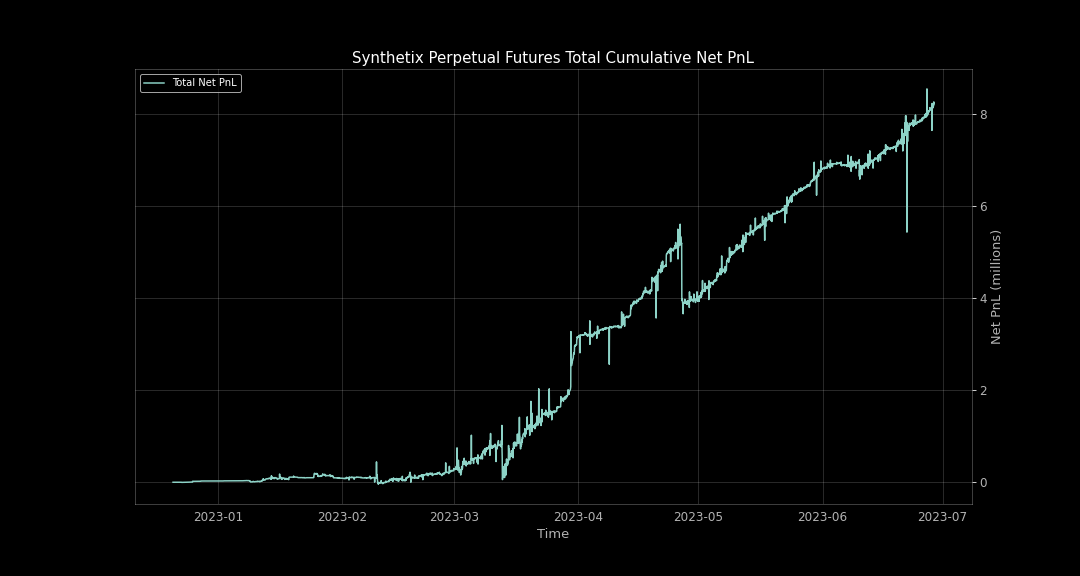

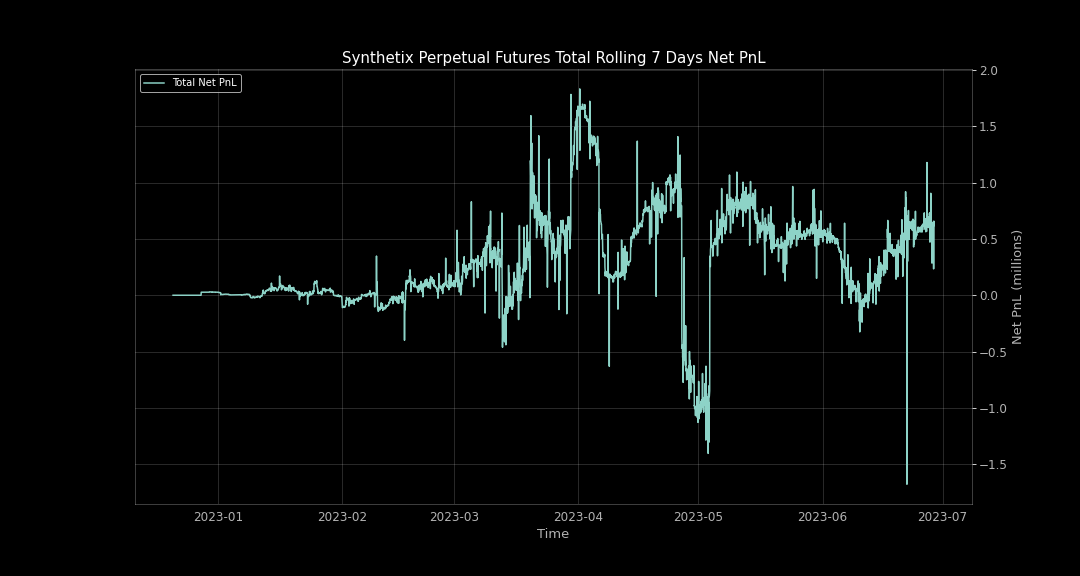

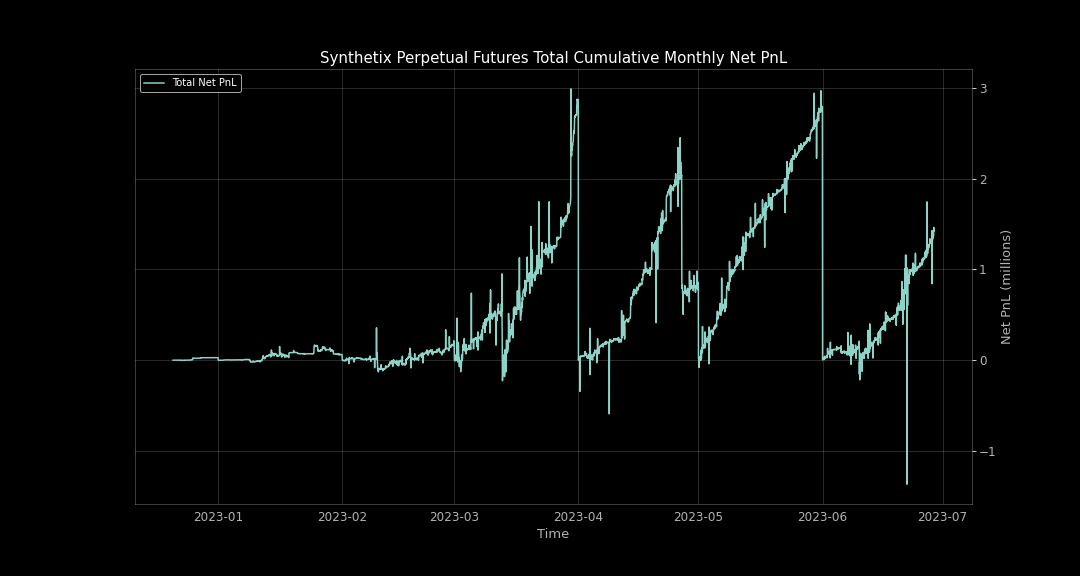

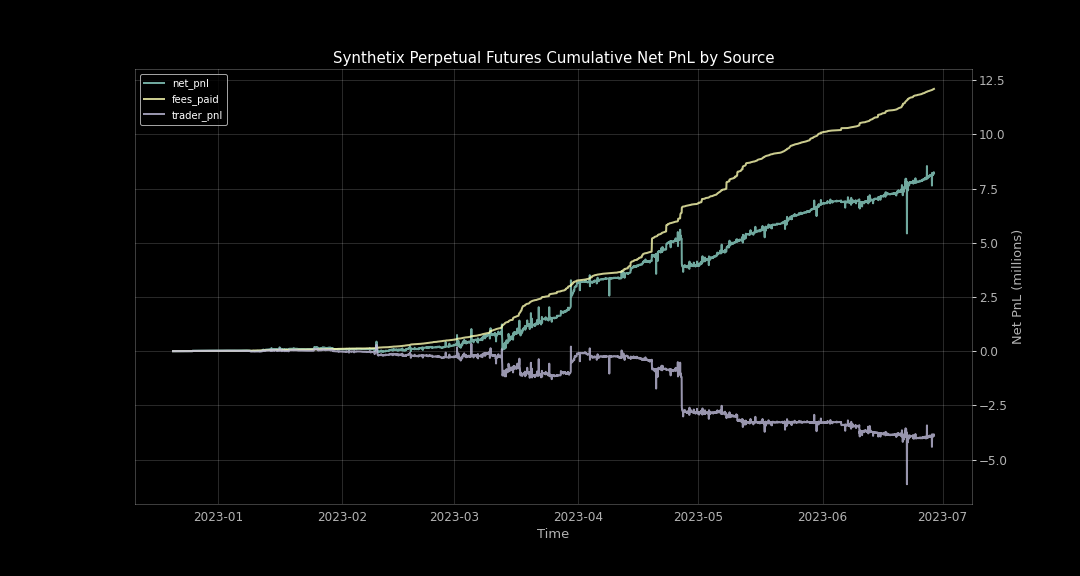

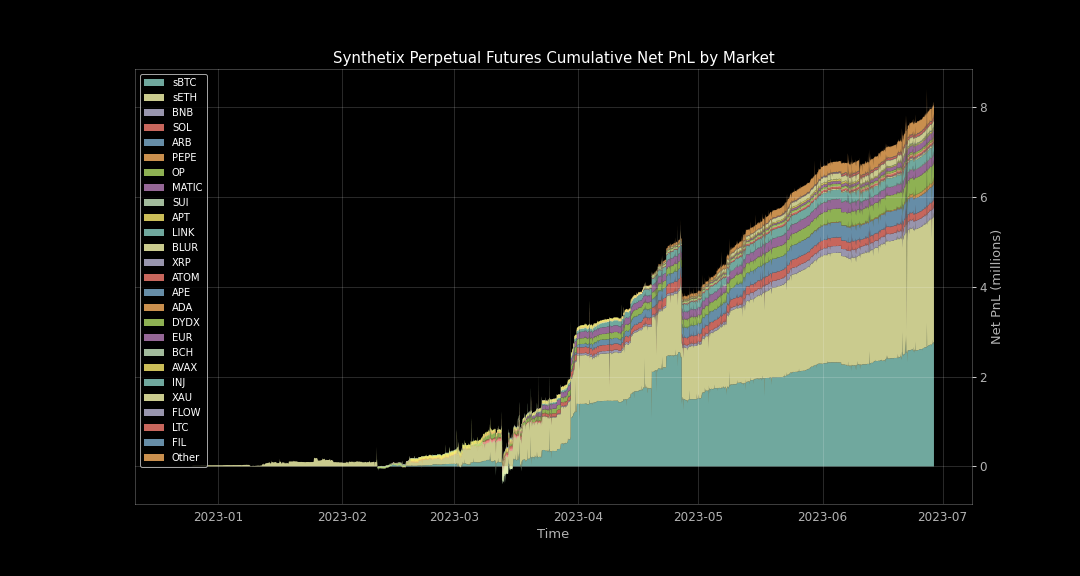

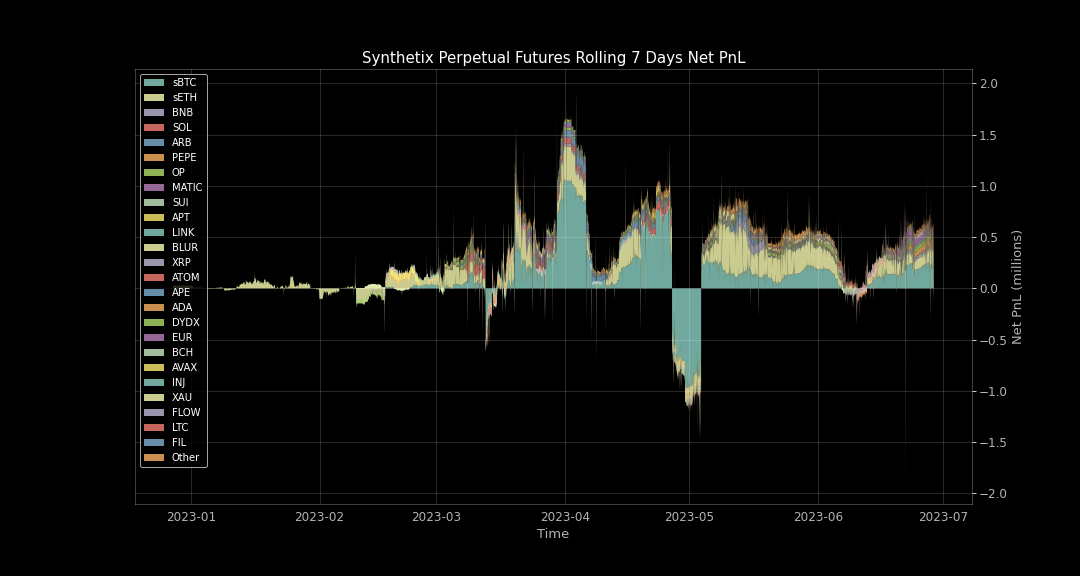

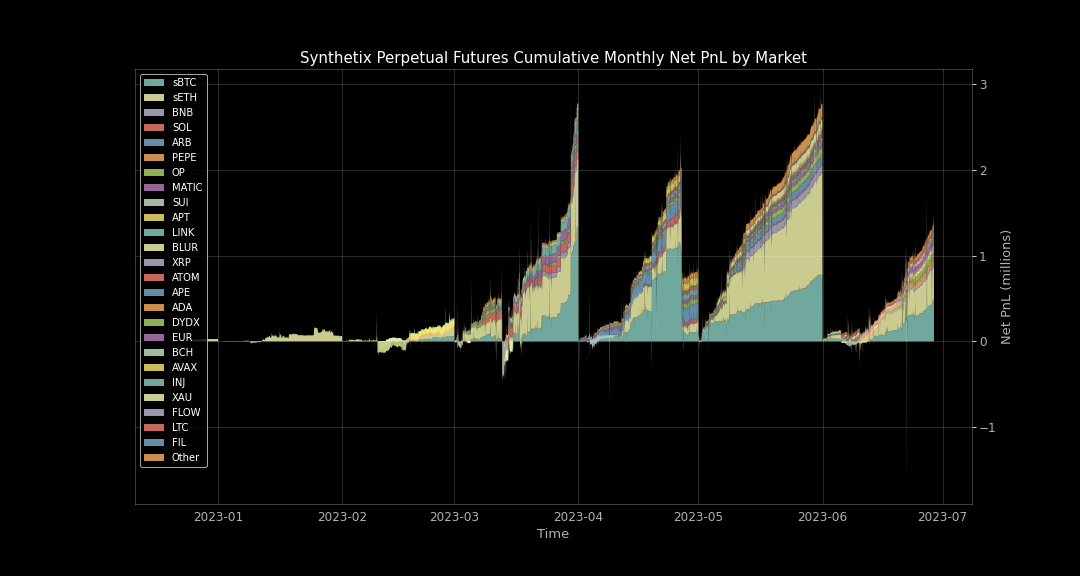

In [7]:
display_charts()    